<a href="https://colab.research.google.com/github/JennEsquivel/EDP1/blob/main/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de una solución de la ecuación del calor**

*Elaboró: Jennifer Esquivel Saldaña*

Ejercicio 1.

La solución de la ecuación:

$\frac{\partial u}{\partial \:t}=\frac{\partial ^2u}{\partial x^2}$

sujeta a las condiciones de frontera:

$u\left(0,t\right)=u\left(1,t\right)=0$, $\:t>0$

y la condición inicial:

$u\left(x,0\right)=2x+1,\:0<x<1$

Está dada en términos de la serie de Fourier por la expresión:

$u\left(x,\:t\right)=\sum _{n=1}^{\infty }\left[1-\left(-1\right)^n3\right]\:\left(\frac{2}{n\pi \:}\right)sin\left(n\pi x\right)e^{^{-\left(n\pi \right)^2t}}$

Graficamos la condición inicial:

In [ ]:
from pylab import *
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 2*x[i]+1
    return y
 

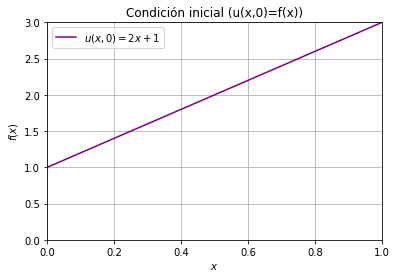

In [ ]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=2x+1$',color='purple')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([0, 1]),ylim([0,3]),grid(),legend()
show()

Con el uso de la serie de Fourier, aproximamos la condición inicial $u\left(x,0\right)=f(x)=2x+1$

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += [(1)-3*(-1)**(n)]*sin(n*pi*x)/(n)
    return (2.0/pi)*f

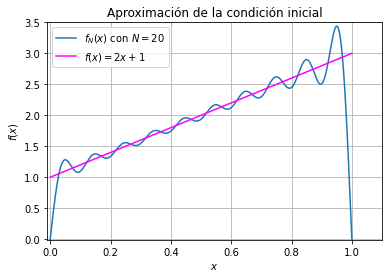

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=2x+1$', color='magenta')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,3.5]),grid(),legend()
show()


Se observa una aproximación para 20 armónicos. (se puede aproximar al número de armónicos que queramos.)

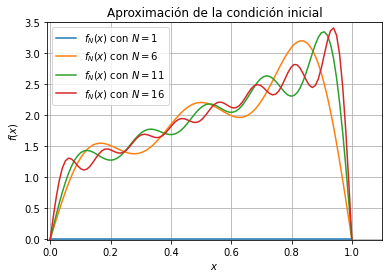

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,3.5]),grid(),legend()
show()

Si tomamos el momento inicial $t=0$, se puede observar la solución completa.

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += [(1)-3*(-1)**(n)]*sin(n*pi*x)/(n) *exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

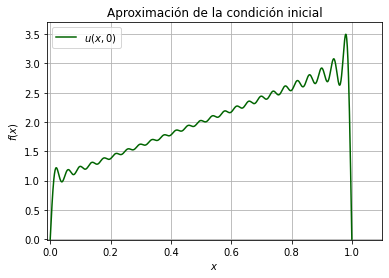

In [ ]:
plot(x,U[:,0],label='$u(x,0)$', color='darkgreen')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,3.7]),grid(),legend()
show()

Cuando $t\to\infty$, la solución va evolucionando.

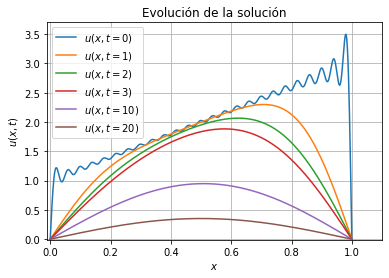

In [ ]:
plot(x,U[:,0],label='$u(x,t=0)$') 
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.1]),ylim([-0.01,3.7]),grid(),legend()
show()

Graficamos en 3D para observar de otra manera la solución cuando va evolucionando.

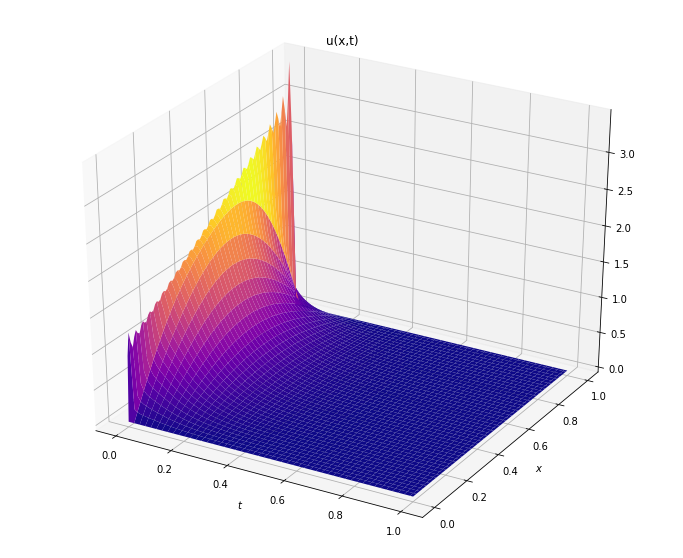

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"